<a href="https://colab.research.google.com/github/Ioshami/LSTM/blob/main/LSTM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Маленький простой пример использования LSTM**


---





Создадим набор данных, изображающий прямую линию

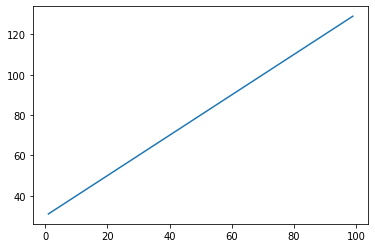

In [26]:
import numpy
import matplotlib.pyplot as plt

x = numpy.arange (1,100,1)
y = x + 30
plt.plot(x,y)

Разделим данные на обучающие и тестовые

In [27]:
trainx, testx = x[0:int((len(x)))], x[int((len(x))):]
trainy, testy = y[0:int((len(y)))], y[int((len(y))):]
train = numpy.array(list(zip(trainx,trainy)))
test = numpy.array(list(zip(trainx,trainy)))

*Векторизация* . Разделение данных на два вектора, отличных на одно значение, чтобы потом предсказывать его 

In [28]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return numpy.array(dataX), numpy.array(dataY)

In [29]:
look_back = 1
trainx,trainy = create_dataset(train, look_back)
testx,testy = create_dataset(test, look_back)
trainx = numpy.reshape(trainx, (trainx.shape[0], 1, 2))
testx = numpy.reshape(testx, (testx.shape[0], 1, 2))


Теперь можно обучать сеть

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(128,input_shape = (trainx.shape[1], 2)))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainx, trainy, epochs = 2000, batch_size = 10, verbose = 2, shuffle = False)
model.save_weights('LSTMBasic1.h5')

Epoch 1/2000
10/10 - 2s - loss: 5222.1265 - 2s/epoch - 185ms/step
Epoch 2/2000
10/10 - 0s - loss: 5110.1182 - 51ms/epoch - 5ms/step
Epoch 3/2000
10/10 - 0s - loss: 4999.5088 - 37ms/epoch - 4ms/step
Epoch 4/2000
10/10 - 0s - loss: 4859.7876 - 32ms/epoch - 3ms/step
Epoch 5/2000
10/10 - 0s - loss: 4705.7153 - 33ms/epoch - 3ms/step
Epoch 6/2000
10/10 - 0s - loss: 4576.1626 - 37ms/epoch - 4ms/step
Epoch 7/2000
10/10 - 0s - loss: 4455.3716 - 30ms/epoch - 3ms/step
Epoch 8/2000
10/10 - 0s - loss: 4345.3208 - 38ms/epoch - 4ms/step
Epoch 9/2000
10/10 - 0s - loss: 4228.3066 - 34ms/epoch - 3ms/step
Epoch 10/2000
10/10 - 0s - loss: 4116.9824 - 35ms/epoch - 3ms/step
Epoch 11/2000
10/10 - 0s - loss: 3991.6191 - 34ms/epoch - 3ms/step
Epoch 12/2000
10/10 - 0s - loss: 3858.1199 - 33ms/epoch - 3ms/step
Epoch 13/2000
10/10 - 0s - loss: 3743.5801 - 34ms/epoch - 3ms/step
Epoch 14/2000
10/10 - 0s - loss: 3642.8293 - 36ms/epoch - 4ms/step
Epoch 15/2000
10/10 - 0s - loss: 3535.4316 - 33ms/epoch - 3ms/step
Epoc

In [47]:
model.load_weights('LSTMBasic1.h5')
predict = model.predict(testx)

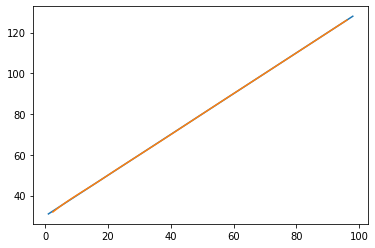

In [48]:
plt.plot(testx.reshape(98,2)[:,0:1], testx.reshape(98,2)[:,1:2])
plt.plot(predict[:,0:1], predict[:,1:2])